<font color="maroon" size="6"><center><b>Time Series Analysis</b></center></font>
<font color="Royalblue" size="4"><center><b>Owner: Sushant Borade</b></center></font>
<font color="Royalblue" size="4"><center><b>Mail ID: sushant.9196@gmail.com</b></center></font>

<font size="4"><b>Loading the dataSet</b></font>

In [73]:
import pandas as pd
import os as os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [76]:
filepath = "F:\github"
filename = "Sales_Monthly_Time_Series.csv"

data = pd.read_csv(os.path.join(filepath, filename))

In [77]:
data.head() #Top 5 rows

,Unnamed: 0,Month,Sales
0,0,1960-01,648
1,1,1960-02,646
2,2,1960-03,639
3,3,1960-04,654
4,4,1960-05,630


In [78]:
data.tail() #Bottom 5 rows

,Unnamed: 0,Month,Sales
109,109,1969-02,1425
110,110,1969-03,1419
111,111,1969-04,1432
112,112,1969-05,1394
113,113,1969-06,1327


<font size="5" color="blue"><b><center>EDA</center></b></font>

<font size="4" color="red"><b>Data Cleaning</b></font>

In [79]:
data.shape #Find no or rows and columns

(114, 3)

In [80]:
data.columns #To get column Names

Index(['Unnamed: 0', 'Month', 'Sales'], dtype='object')

In [81]:
data['Unnamed: 0'].nunique(),data.shape[0]

(114, 114)

<font size="3">We Can see that unique value in "Unnamed: 0" column is same as that of no of rows, thus "Unnamed: 0" column can just be consider as a row identifier So we can drop that column</font>

<Font color="Red" size="4"><b>Remove Unwanted Columns</b></Font>

In [82]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.head()

,Month,Sales
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


<font size="4" color="red"><b>Check For missing values</b></font>

In [83]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

<font size="4" color="green"><b>Lucky !! No missing data :)</b></font>

<font size="4" color="blue"><b>data types</b></font>

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
Month    114 non-null object
Sales    114 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


<font size="4" color="blue"><b>Change Data Type of Month from Object to Date & set that column to index</b></font>

In [85]:
data['Month'] = pd.to_datetime(data['Month'], format = '%Y-%m')
data.head()

,Month,Sales
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [86]:
data = data.set_index("Month")
data.head()

,Sales
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


<font size="4" color="blue"><b>Plot Sales w.r.t to Month</b></font>

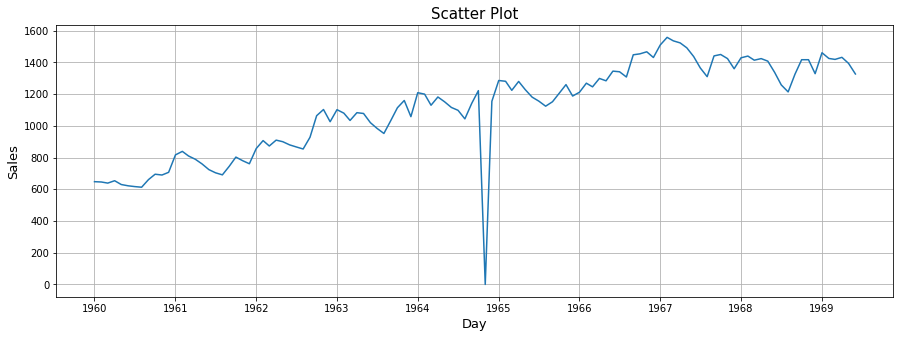

In [87]:
plt.figure(figsize = (15,5))
plt.plot(data["Sales"])
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

<font size="4" color="blue"><b>Outlier identification and Treatment</b></font>

In [88]:
data[data["Sales"] < 400]

,Sales
Month,
1964-11-01,0


In [89]:
data_2 = data.copy()
data_2["Sales"] = np.where(data_2["Sales"] == 0, np.nan, data_2["Sales"])

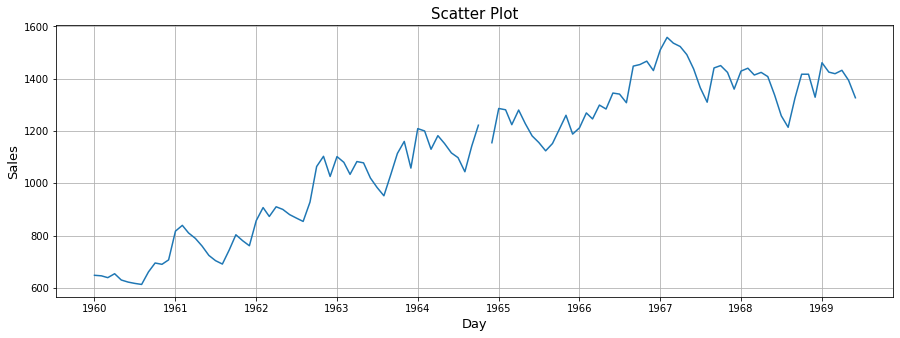

In [90]:
plt.figure(figsize = (15,5))
plt.plot(data_2["Sales"])
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

In [91]:
#outlier Treatment using ffill method
data_2["Sales"] = data_2["Sales"].fillna(method = "ffill")

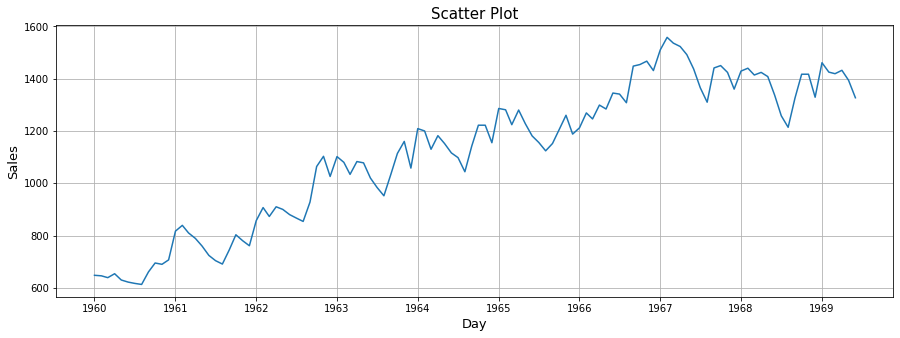

In [92]:
plt.figure(figsize = (15,5))
plt.plot(data_2["Sales"])
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

<font size="4" color="blue"><b>Decompose time series plot in trend, seasonality and Residual</b></font>

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [94]:
decomposition = seasonal_decompose(data_2["Sales"])

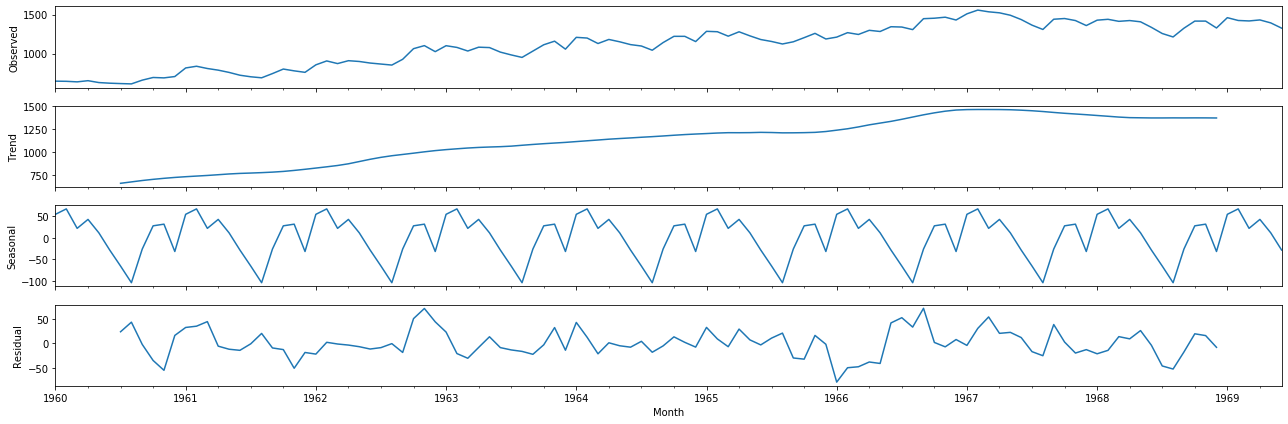

In [95]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 6
decomposition.plot()
plt.show()

In [96]:
data_2["Trend"] = decomposition.trend
data_2["Seasonal"] = decomposition.seasonal
data_2["Error"] = decomposition.resid

In [97]:
data_2[data_2.index == "1965-01-01"]

,Sales,Trend,Seasonal,Error
Month,,,,
1965-01-01,1286.0,1199.333333,54.228202,32.438465


<font size="4" color="blue"><b>Split data into train and test</b></font>

In [98]:
train = data_2[(data_2.index >= "1960-01-01") & (data_2.index < "1968-01-01")]
test = data_2[data_2.index >= "1968-01-01"]

In [99]:
train.shape, test.shape

((96, 4), (18, 4))

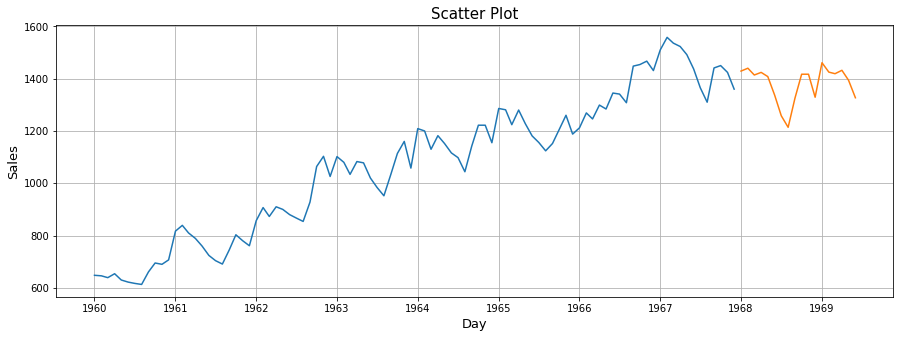

In [100]:
plt.figure(figsize = (15,5))
plt.plot(train["Sales"])
plt.plot(test["Sales"])
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

<font size="6" color="maroon"><b><center><u>Model 1: Simple Avearage </u></center></b></font>

In [101]:
test["Avg Sales"] = train["Sales"].mean()

In [102]:
train["Sales"].mean()

1071.4479166666667

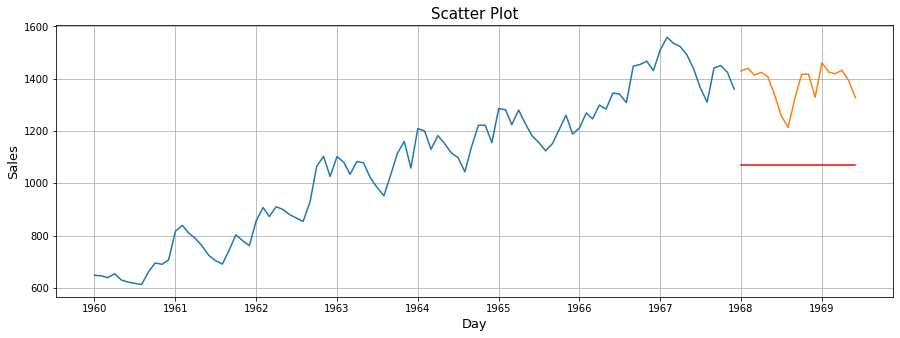

In [103]:
plt.figure(figsize = (15,5))
plt.plot(train["Sales"])
plt.plot(test["Sales"])
plt.plot(test["Avg Sales"], color = "red")
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

In [104]:
rmse = sqrt(mean_squared_error(test["Sales"], test["Avg Sales"]))
print("Simple Average \nRMSE = ", round(rmse, 2))

Simple Average 
RMSE =  317.2


<font size="6" color="maroon"><b><center><u>Model 2: Rolling Avearage </u></center></b></font>

In [105]:
test["Rolling Sales"] = train['Sales'].rolling(12).mean().iloc[-1]

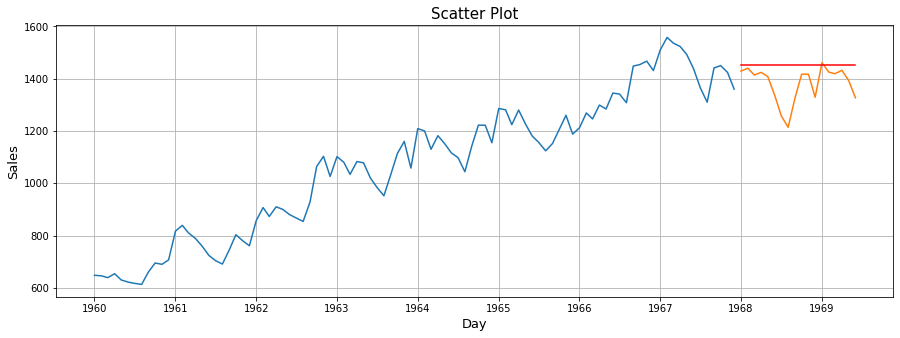

In [106]:
plt.figure(figsize = (15,5))
plt.plot(train["Sales"])
plt.plot(test["Sales"])
plt.plot(test["Rolling Sales"], color = "red")
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

In [107]:
rmse = sqrt(mean_squared_error(test["Sales"], test["Rolling Sales"]))
print("Rolling Average \nRMSE = ", round(rmse, 2))

Rolling Average 
RMSE =  95.26


<font size="6" color="maroon"><b><center><u>Model 3: Simple Exponential Average</u></center></b></font>

In [108]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [109]:
se = SimpleExpSmoothing(train['Sales'])
se = se.fit(smoothing_level=0.7)

In [110]:
test["SimpleExp"] = se.forecast(len(test))

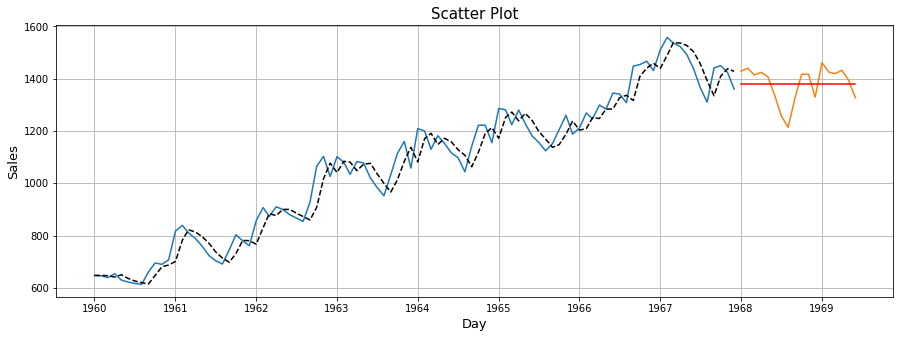

In [111]:
plt.figure(figsize = (15,5))
plt.plot(train["Sales"])
plt.plot(se.fittedvalues, color = "black", ls = "--")
plt.plot(test["Sales"])
plt.plot(test["SimpleExp"], color = "red")
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

In [112]:
rmse = sqrt(mean_squared_error(test["Sales"], test["SimpleExp"]))
print("Simple Exponential \nRMSE = ", round(rmse, 2))

Simple Exponential 
RMSE =  65.92


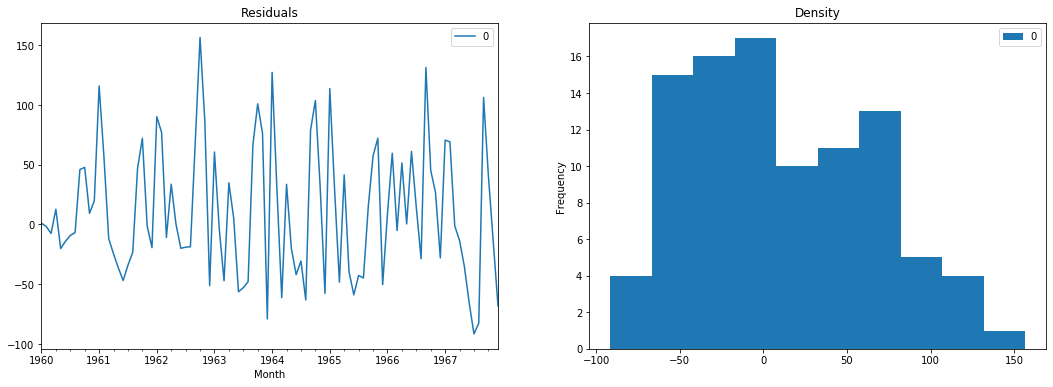

In [113]:
# Plot residual errors
residuals = pd.DataFrame(se.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind = "hist", title='Density', ax=ax[1])
plt.show()

<font size="6" color="maroon"><b><center><u>Model 4: Holt Linear Trend (Consider only Trend)</u></center></b></font>

In [114]:
#from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import Holt

In [115]:
holt = Holt(train['Sales'])
holt = holt.fit()
test['Holt_linear'] = holt.forecast(len(test))

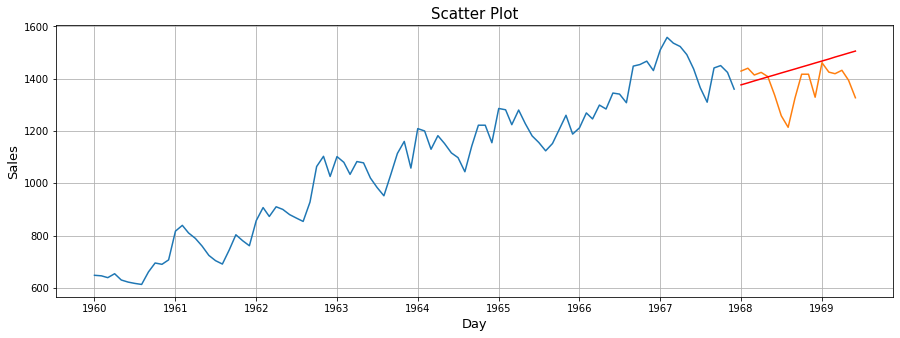

In [116]:
plt.figure(figsize = (15,5))
plt.plot(train["Sales"])
#plt.plot(holt.fittedvalues, color = "black", ls = "--")
plt.plot(test["Sales"])
plt.plot(test["Holt_linear"], color = "red")
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()


In [117]:
rmse = sqrt(mean_squared_error(test["Sales"], test["Holt_linear"]))
print("Holt Linear \nRMSE = ", round(rmse, 2))

Holt Linear 
RMSE =  97.31


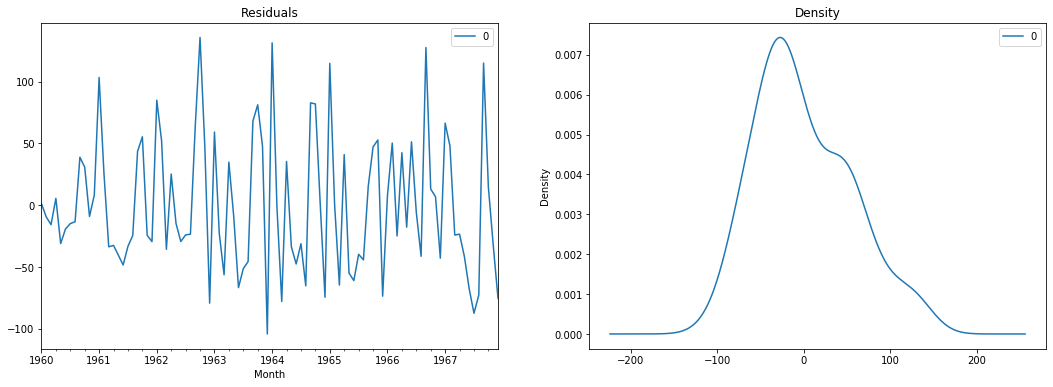

In [118]:
# Plot residual errors
residuals = pd.DataFrame(holt.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<font size="6" color="maroon"><b><center><u>Model 5: Holt Winter (consider both trend and Seasonality)</u></center></b></font>

In [119]:
from statsmodels.tsa.api import ExponentialSmoothing

In [120]:
es = ExponentialSmoothing(train['Sales'], seasonal_periods = 12, seasonal = "add")
es = es.fit()
test['Holt_Winter'] = es.forecast(len(test))

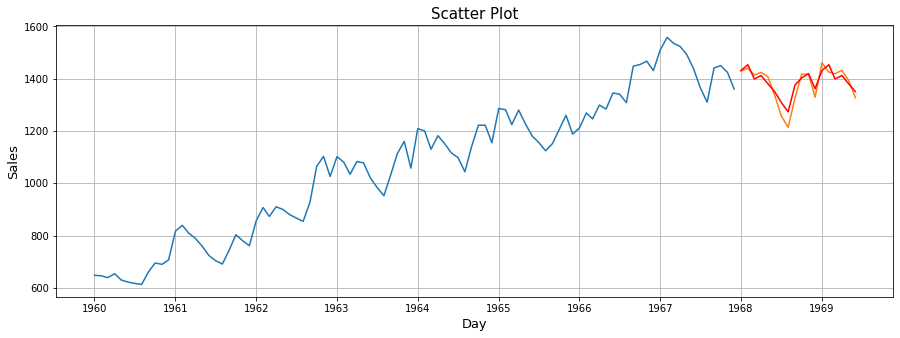

In [121]:
plt.figure(figsize = (15,5))
plt.plot(train["Sales"])
#plt.plot(es.fittedvalues, color = "black", ls = "--")
plt.plot(test["Sales"])
plt.plot(test["Holt_Winter"], color = "red")
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

In [122]:
rmse = sqrt(mean_squared_error(test["Sales"], test["Holt_Winter"]))
print("Holt Winter \nRMSE = ", round(rmse, 2))

Holt Winter 
RMSE =  28.4


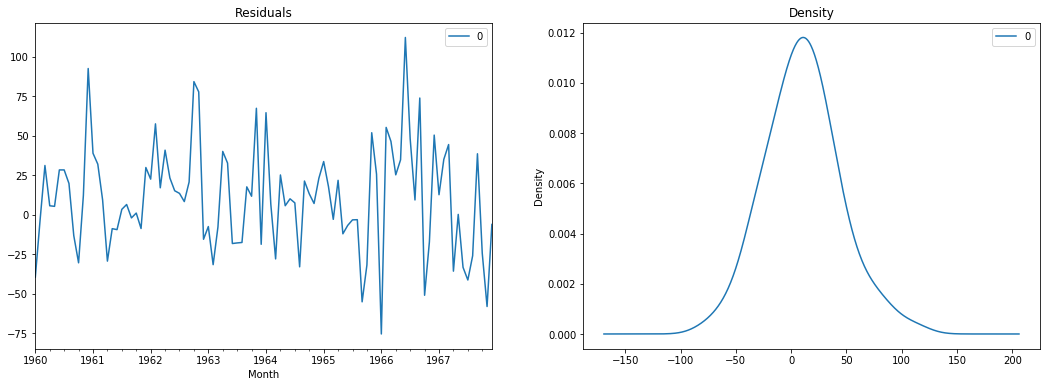

In [123]:
# Plot residual errors
residuals = pd.DataFrame(es.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<font size="6" color="maroon"><b><center><u>Model 6: ARIMA</u></center></b></font>

<font size="4" color="blue"><b>Data Should be Stationary for Arima Model, Check Stationarity od Data via adfuller Test</b></font>

<Font color="green" size="4"><b>Adfuller Test: To check Time Series is Stationary or not !!
</b></font>

 * Null Hypothesis = Not Stationary
 * Alternate Hypothesis = Stationary

In [124]:
from statsmodels.tsa.stattools import adfuller

In [125]:
result = adfuller(data_2["Sales"])  # Null Hypo: NS, # Alternate Hypo: Stationary
print('p-value: ', result[1])

p-value:  0.5149663653713259


In [126]:
if (result[1] <= 0.05):
    print ("Reject H0, Is Stationary")
else:
    print ("Not Stationary")

Not Stationary


<font size="4" color="blue"><b>Single differencing</b></font>

In [127]:
series = data_2["Sales"].diff().fillna(0)  # Transform to Check stationary 

result = adfuller(series)
print('p-value: %f' % result[1])
    
if (result[1] <= 0.05):
    print ("\nReject H0, Is Stationary")
else:
    print ("\nNot Stationary")

p-value: 0.301239

Not Stationary


<font size="4" color="blue"><b>Double Differencing</b></font>

In [128]:
series = data_2["Sales"].diff().diff().fillna(0)  # Transform to Check stationary 

result = adfuller(series)
print('p-value: %f' % result[1])
    
if (result[1] <= 0.05):
    print ("\nReject H0, Is Stationary")
else:
    print ("\nNot Stationary")

p-value: 0.000000

Reject H0, Is Stationary


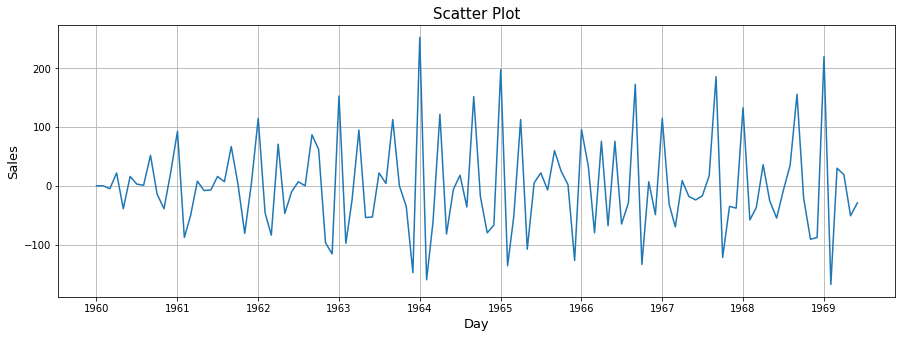

In [129]:
plt.figure(figsize = (15,5))
plt.plot(series)
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

<font size="4" color="green"><b>Since We did two times differencing to get stationary time series thus d=2</b></font>

In [130]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

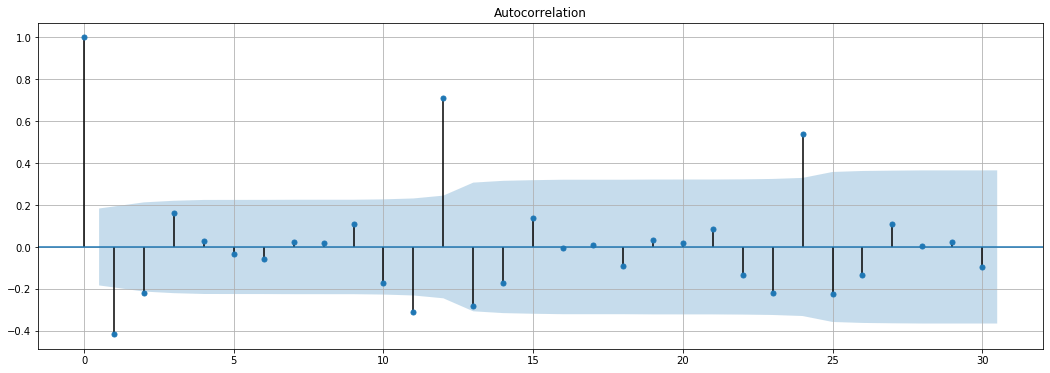

In [131]:
plot_acf(data_2["Sales"].diff().diff().fillna(0), lags = 30) # diff().diff().fillna(0)
plt.grid()
plt.show()


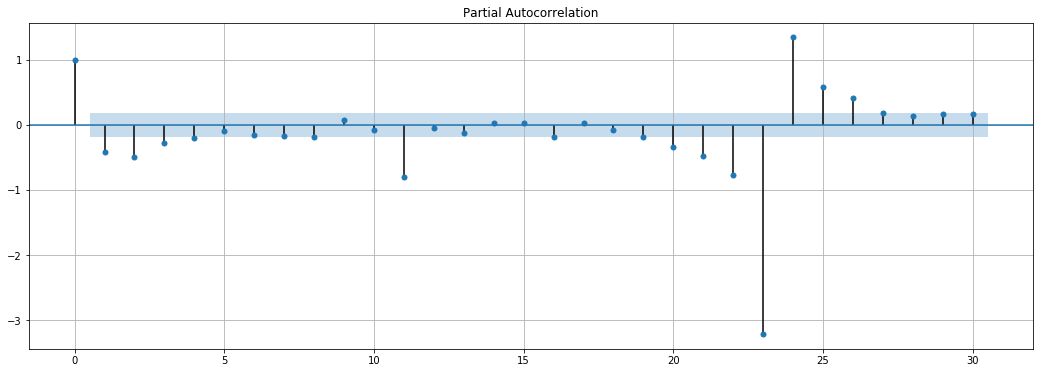

In [132]:
plot_pacf(data_2["Sales"].diff().diff().fillna(0), lags = 30)  # diff().diff().fillna(0)
plt.grid()
plt.show()

<font size="4" color="green"><b>From PACF plot (p values can be (1 or 2 or 3 or 4)) and from ACF plot (q values can be(1 or 2))</b></font> 

<font size="4" color="blue"><b>We will consider p=1,d=2,q=2</b></font>

In [133]:
from statsmodels.tsa.api import ARIMA

In [134]:
arima = ARIMA(train["Sales"], order = (1,2, 2))
arima = arima.fit()
test['Stat ARIMA'] = arima.forecast(steps = len(test))[0]

In [135]:
test["Lower Arima"] = arima.forecast(steps = len(test), alpha=0.05)[2][:, 0]     # 5% error - 95% Confidence
test["Upper Arima"] = arima.forecast(steps = len(test), alpha=0.05)[2][:, 1]

test["Lower 80"] = arima.forecast(steps = len(test), alpha=0.20)[2][:, 0]   # 20% erroe - 805 confidence
test["Upper 80"] = arima.forecast(steps = len(test), alpha=0.20)[2][:, 1]

In [136]:
rmse = sqrt(mean_squared_error(test["Sales"], test["Stat ARIMA"]))
print("Stat ARIMA \nRMSE = ", round(rmse, 2))

Stat ARIMA 
RMSE =  68.39


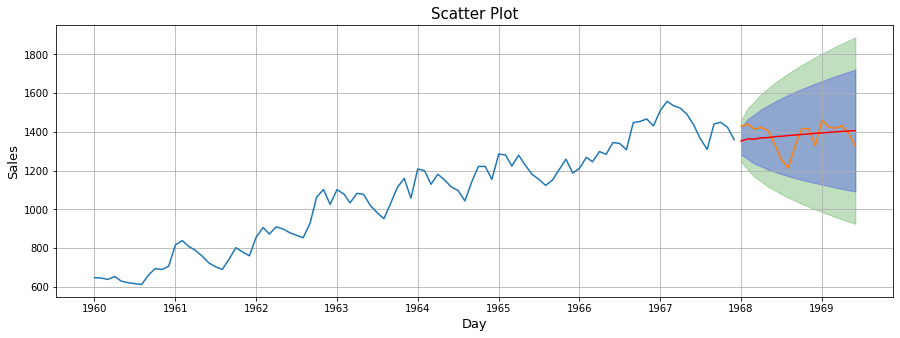

In [137]:
plt.figure(figsize = (15,5))
plt.plot(train["Sales"])
plt.plot(test["Sales"])
plt.plot(test["Stat ARIMA"], color = "red")
plt.fill_between(test.index, test["Lower Arima"], test["Upper Arima"], color='g', alpha=.25)
plt.fill_between(test.index, test["Lower 80"], test["Upper 80"], color='b', alpha=.25)
plt.xlabel("Day", fontsize = 13)
plt.ylabel("Sales", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

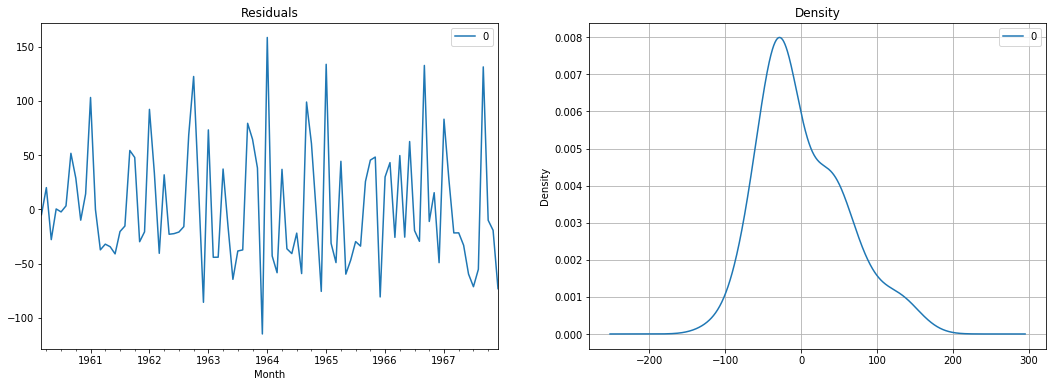

In [138]:
# Plot residual errors
residuals = pd.DataFrame(arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.grid()
plt.show()

<font size="4" color="green"><b>Conclusing Statement</b></font>

    Thus Amongst all the model we can see that Holt Winter Model give lowest RMSE i.e around 28%. Thus we can Consider Holt Winter Model